In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from typing import Tuple
from sklearn.linear_model import LinearRegression

sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle':'--'})

In [2]:
# use the auto data as example
auto = pd.read_csv("https://raw.githubusercontent.com/changyaochen/MECE4520/master/data/auto_mpg.csv")
auto.dropna(inplace=True)
y_min, y_max = 0.8 * auto["mpg"].min(), 1.2 * auto["mpg"].max()

# downsample the data
auto_fit = auto.sample(n=8, random_state=42).reset_index(drop=True)
auto_fit.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,26.0,4.0,96.0,69.0,2189.0,18.0,72.0,2.0,renault 12 (sw)
1,21.6,4.0,121.0,115.0,2795.0,15.7,78.0,2.0,saab 99gle
2,36.1,4.0,91.0,60.0,1800.0,16.4,78.0,3.0,honda civic cvcc
3,26.0,4.0,91.0,70.0,1955.0,20.5,71.0,1.0,plymouth cricket
4,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl


In [3]:
def hstack_higher_order(X: np.array, order: int = 1):
    """Construct a matrix with higher order terms."""
    X_raw = X.reshape(-1, 1)
    X_w_higher_orders = np.zeros(shape=(len(X_raw), order))
    for o in range(order):
        X_w_higher_orders[:, o] = np.power(X_raw, o).reshape(1, -1)
    return X_w_higher_orders

def fit_polynomial(
    X: np.array,
    y: np.array,
    order: int = 1,
) -> Tuple[int, LinearRegression]:
    """Fit a polynomial model to the underlying data."""
    X_fit = hstack_higher_order(X, order)
    # fit the model
    model = LinearRegression()
    model.fit(X_fit, y)
    
    return order, model

In [4]:
X = auto_fit["horsepower"].values
y = auto_fit["mpg"].values

all_models = []
for order in range(1, 7):
    result = fit_polynomial(X=X, y=y, order=order)
    all_models.append(result)

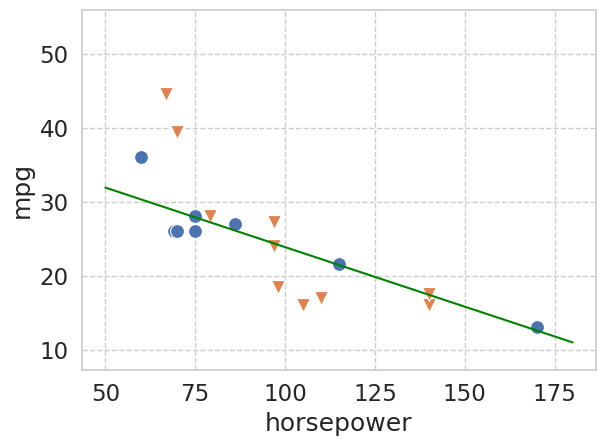

In [5]:
x_plot = np.linspace(start=np.min(X) - 10, stop=np.max(X) + 10, num=100)

plt.figure()
sns.scatterplot(x=X, y=y, s=100)
for order, model in all_models[1:2]:
    x_pred = hstack_higher_order(x_plot, order)
    y_pred = model.predict(x_pred)
    sns.lineplot(x=x_plot, y=y_pred, color="green")

# plot new data
auto_new = auto.sample(n=10, random_state=123).reset_index(drop=True)
sns.scatterplot(x="horsepower", y="mpg", data=auto_new, s=100, marker="v")
plt.gca().set_ylim([y_min, y_max])
plt.tight_layout()
plt.show()